In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
df = pd.read_csv("adult.data")
df.head(5)

,Age,Workclass,Final_weigth,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Get the number of duplicated row
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (24, 15)


In [4]:
#Total data
df.shape

(32561, 15)

In [5]:
#Drop duplicated row
df = df.drop_duplicates()

In [6]:
df.shape

(32537, 15)

In [7]:
#Count the number of missing and null values
df.isin([' ?']).sum(axis=0)

Age                  0
Workclass         1836
Final_weigth         0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income_level         0
dtype: int64

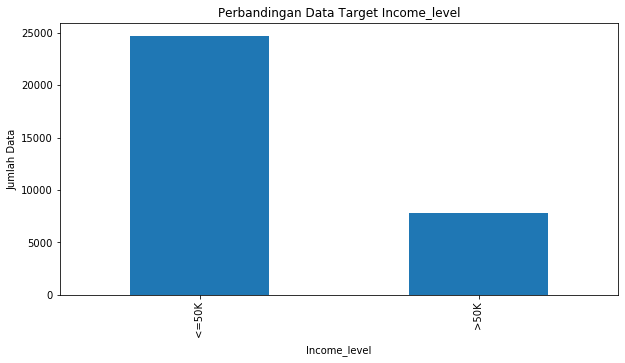

In [8]:
df.Income_level.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Perbandingan Data Target Income_level")
plt.ylabel('Jumlah Data')
plt.xlabel('Income_level');

In [9]:
#Drop data with Missing or Null Value
df.drop(df.loc[df['Workclass']==" ?"].index, inplace=True)
df.drop(df.loc[df['Occupation']==" ?"].index, inplace=True)
df.drop(df.loc[df['Native_country']==" ?"].index, inplace=True)

In [10]:
df.isin([' ?']).sum(axis=0)

Age               0
Workclass         0
Final_weigth      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income_level      0
dtype: int64

In [11]:
string_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income_level']
for col in string_col:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

df

,Age,Workclass,Final_weigth,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_level
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [12]:
feature_cols = ['Workclass', 'Final_weigth', 'Education', 'Education_num','Marital_status','Occupation','Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']
X = df[feature_cols] # Features
y = df.Income_level # Target variable

In [13]:
from sklearn import preprocessing #untuk normalisasi
from imblearn.over_sampling import SMOTE #oversampling

Using TensorFlow backend.


In [14]:
#Normalize Data
X = preprocessing.normalize(X)

In [15]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

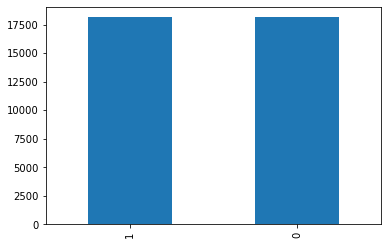

In [16]:
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)
pd.Series(y_train_new).value_counts().plot.bar()

In [17]:
y_train_new = y_train_new.reshape(-1,1)

In [18]:
X_train = X_train_new
y_train = y_train_new

In [19]:
hdTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [20]:
hdTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
predTree = hdTree.predict(X_test)

In [22]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.47428666224286664


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #confusion matrix

In [27]:
print(classification_report(y_test, predTree.round()))

              precision    recall  f1-score   support

           0       0.90      0.33      0.48      4496
           1       0.31      0.89      0.46      1532

    accuracy                           0.47      6028
   macro avg       0.61      0.61      0.47      6028
weighted avg       0.75      0.47      0.48      6028



In [28]:
cm = confusion_matrix(y_test, predTree.round())
cm

array([[1492, 3004],
       [ 165, 1367]], dtype=int64)

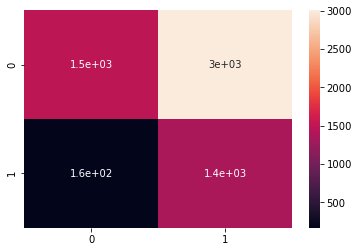

In [30]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [31]:
#true positive = data asli benar, prediksi bener -> 1500
#true negative = data asli false, prediksi salah -> 1400
#false positive = data asli false, tp prediksi true -> 300
#false negative = data asli benar, tp prediksi salah -> 160